# 1. Geometric modeling 

The __geometric model__ of a robot is a set of equations describing the robot's geometry. This enables for instance to calculate the end-effector's position in the workspace based on the joint angles. There are 2 kinds of geometric models:

- __Direct Geometric Model (DGM)__ : given joint positions, it gives the position of the end-effector (tool, hand, foot, etc.) with respect to the robot's base 

- __Inverse Geometric Model (IGM)__ : given an end-effector position (and orientation), it gives the joint positions 

The joint positions are usually denoted by $q$ and belong to __joint space__. The end-effector's pose is denoted $p$ and belongs to the __task space__, or cartesian space. The geometric model is in fact a mapping between the joint space and the task space. We will introduce these concepts more concretely with examples.

__Note__: This Notebook contains trigonometry formulas. Take a look at this [cheatsheet](https://tutorial.math.lamar.edu/pdf/trig_cheat_sheet_reduced.pdf) if you feel lost.

# 1R robot - single revolute joint & link robot

Consider the simple robot arm consisting of 1 revolute joint and 1 link. 

In [1]:
## Author: Sebastien
## Date : 22/06/2020

# Import required packages for this notebook
import numpy as np
from matplotlib import pyplot as plt
import IPython
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

# If full github repo has been downloaded locally, uncomment these lines
# from IPython.display import Image
# Image("1dof.png")

# Otherwise click on the link below to see the figure

<!-- For Colab NB -->
[1R robot (click here)](https://drive.google.com/file/d/1aSBG3kNHr6wBTUF9SetZ0xkq7uHdxFpx/view?usp=sharing)

One way to describe the robot configuration is to use the joint angle $q\in[-\pi,\pi]$. Knowing $q$, the DGM enables to determine the end-effector's position $p=(x_p,y_p)$ with respect to a fixed reference coordinate frame attached to the base. In this case: the joint space is then the interval $[-\pi,\pi]$ and the task space is the cartesian plane $\mathbb{R}^2$. The DGM equations are

$$
x_p = L \cos(q) \\
y_p = L \sin(q)
$$

where $(x_p,y_p)$ are the cartesian coordinates of the end-effector and $L$ is the length of the link. The same equations can be expressed more compactly as 

$$
p = DGM(q)
$$

where $DGM$ is a function taking a joint angle $q$ as an input and outputs a cartesian position $p=(x_p,y_p)$ expressed in the base frame. It is implemented in python as follow

In [2]:
# Define the link length
L = 1.

# Function corresponding to the direct geometric model
def DGM(q):
    '''
    Input : joint angle (in rad)
    Output : end-effector position (in m)
    '''
    
    x_p = L * np.cos(q)
    y_p = L * np.sin(q)
    
    p = np.array([x_p, y_p])
    
    return p

# Test the DGM and display the result
q = 1.7
p = DGM(q)
print("The end-effector position corresponding to q = " + str(q) + " is : p = " +str(p))

The end-effector position corresponding to q = 1.7 is : p = [-0.12884449  0.99166481]


The IGM solves the converse problem: given an end-effector position (task space), it returns the corresponding position. The IGM is derived by inverting the DGM equations, i.e. by expressing $q$ in terms of $p$. Recall the DGM

$$
x_p = L cos(q) \\
y_p = L sin(q)
$$

Assuming $cos(q) \neq 0$ we can divide the second equation by the first equation

$$
\frac{y_p}{x_p} = \frac{\sin(q)}{\cos(q)} = \tan(q)\\
$$

Therefore the IGM reads

$$
q = tan^{-1}\left(\frac{y_p}{x_p}\right)
$$

The following function implements the IGM (we use the arctan2 function https://en.wikipedia.org/wiki/Atan2).

In [3]:
# Function corresponding to the inverse geometric model
def IGM(p):
    '''
    Input : end-effector position (in m)
    Output : joint angle (in rad)
    '''
    
    x_p = p[0]
    y_p = p[1]
    
    q = np.arctan2(y_p, x_p)
    
    return q

# Test the DGM and display the result
p = np.array([0.3, 0.5])
q = IGM(p)
print("The joint position corresponding to p = "+str(p)+" is : q = "+str(q))

The joint position corresponding to p = [0.3 0.5] is : q = 1.0303768265243125


__Question__ : For which value(s) $q$ do we have $cos(q) = 0$ ? In this case, can we still use the IGM we derived previously in order to calculate $q$ ? 

Now we summarize the geometric model of the 1R robot into a python class

In [4]:
# Class for the geometric model of the 2R robot
class GeometricModel1R:
    '''
    Environment class for the geometric model of the 1R robot
    '''
    
    def __init__(self, L):
        ''' 
        Initialize model parameters
        '''
        self.L = L
    
    def DGM(self, q):
        '''
        Input : joint angle (in rad)
        Output : end-effector position (in m)
        '''
        x_p = self.L * np.cos(q)
        y_p = self.L * np.sin(q)
        p = np.array([x_p, y_p])
        return p

    def IGM(self, p):
        '''
        Input : end-effector position (in m)
        Output : joint angle (in rad)
        '''
        x_p = p[0]
        y_p = p[1]
        q = np.arctan2(y_p, x_p)
        return q

    def animate(self, q):
        '''
        Animate the robot using DGM 
        Input : sequence of joint positions [q1, ..., q2]
        '''
        fig = plt.figure()
        ax = plt.axes(xlim=(-self.L -1, self.L + 1), ylim=(-self.L -1, self.L + 1))
        link, = ax.plot([], [], lw=4)
        base, = ax.plot([], [], 'o', color='black')
        endeff, = ax.plot([], [], 'o', color='pink')
        
        def init():
            link.set_data([], [])
            base.set_data([], [])
            endeff.set_data([], [])
            return link, base, endeff
        
        def animate(i):
            p = self.DGM(q[i])
            x = p[0] 
            y = p[1] 
            link.set_data([0, x], [0, y])
            base.set_data([0, 0])
            endeff.set_data([x, y])
            return link, base, endeff
        
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, "One Dof Manipulator Animation", transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
        ax.grid()
        ax.set_aspect("equal")
        
        anim = FuncAnimation(fig, animate, init_func=init,
                             frames=np.shape(q)[0], interval=25, blit=True)

        plt.close(fig)
        plt.close(anim._fig)
        IPython.display.display_html(IPython.core.display.HTML(anim.to_html5_video()))

__Question__ : assume that we are given a sequence of joint positions $q_1, ..., q_n$. We want to calculate the corresponding end-effector trajectory in the task space, namely $p_1, ..., p_n$. Using the `GeometricModel1R` class defined above, fill out the code below to generate this sequence of end-effector positions. Call the `animate` function in order to visualize the motion.

[0.00000000e+00 6.40702200e-02 1.27877162e-01 1.91158629e-01
 2.53654584e-01 3.15108218e-01 3.75267005e-01 4.33883739e-01
 4.90717552e-01 5.45534901e-01 5.98110530e-01 6.48228395e-01
 6.95682551e-01 7.40277997e-01 7.81831482e-01 8.20172255e-01
 8.55142763e-01 8.86599306e-01 9.14412623e-01 9.38468422e-01
 9.58667853e-01 9.74927912e-01 9.87181783e-01 9.95379113e-01
 9.99486216e-01 9.99486216e-01 9.95379113e-01 9.87181783e-01
 9.74927912e-01 9.58667853e-01 9.38468422e-01 9.14412623e-01
 8.86599306e-01 8.55142763e-01 8.20172255e-01 7.81831482e-01
 7.40277997e-01 6.95682551e-01 6.48228395e-01 5.98110530e-01
 5.45534901e-01 4.90717552e-01 4.33883739e-01 3.75267005e-01
 3.15108218e-01 2.53654584e-01 1.91158629e-01 1.27877162e-01
 6.40702200e-02 1.22464680e-16]


/tmp/ipykernel_665692/1983737448.py:55: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  base.set_data([0, 0])
/tmp/ipykernel_665692/1983737448.py:56: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  endeff.set_data([x, y])


<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAoGG1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA8nZYiE
AC///vau/MsrRwuVLh1Ze7NR8uhJcv2IMH1oAAADAADVaeUGU/F8HDusAMQDkKW5N1RMvqhe+MpT
mxLSARXJxzEZcSDrAABOFbni/QtH1tgyV49m/jGwUZbAceU2NiLnn34WkCPFZy3Qc3GJSQ73H6bb
l5huMyYATzZ8beET7hDJt/TXloQH+Oq14DAdOdRzrVbOHouXeKnTA829F4+5RAEqhLzsVcjdSLwy
d9ox77mwJTPsxc9F7eYvmftzFlc4/5S72ERKPmD5u5jxGTpX8fpfpEsyDRKSHGPN6i9aOelldRj9
Z19BCs4+4q0QyICQL60TfBoh4nVz6cURqwG30AqXvwg3MBb7r/dB3NHZTXO/blbgXS8DwsI8Y1ox
ArpjqxTYgX4A3APZ7NJESMasxTXbBi4sccp4ukMT7Z6FLMZnw+2b20vD5s8yI1n6HEJtoQ4KscdK
J6/BVwqfGMZwZBXce97LT+njBA8FX+3XE7HSR5V5rvYq/KbbmpzW90bjb5eyOUvtikI/ZDGMMN1l
ZRcS/LVoLXS59I9aRlN1xEZX6x98znNK3Rcxb7dF9SuQHyiLcLy8FNc4cm7sWwqNeuAuec518ATx
8D5YHW9gGD6d3o6NvCjBM+1gjB87q7shBOjG3OgJgDqtCaMHPDIB3HgWhdrDeUGtGCDCENiOv2kx
VS451A23/LzsykIsrQcsyuC/eXVuQynIyvBn+Hqg249A4wc3SNeJU/AMsBns8jrGLApmryvMKdy1
3aio9BZkptoIeG0sw4GASuDzwdPDgBnZSlfFP5PCSspCO/FRLiDceuIG1Za28w5YokuK9PNBL3XI
8ka6+SHSECeEe2iKrZMR8COtjoboah0l3VtfrzZ2dVSsunKzgA3kB95WVNvxqmv8jL8NeyPg0GfZ
6/Pau32CTURP0EeaCvqoSoGY1q4m8KQ93PiXrf6+eXId/1DI1qCDcqwZJCs57+Dc2Qogk8oDMLAq
9yvi1TzBbBHIp8oeLgXWpnAZsByE8iOKeJQGEHv52sqTCruUa65auFTfpXZD/D82wn1eaKHLBjsi
pyl1mRhL/Y9eQSWQ/PW6U5kmiu3nTcbGvInLpXZ8mr8RTvqPNs6xL49dckBwSPGafG2970MOSzzF
NlAF58BQRlfjPq66dRC+NXcybILDN0Y8snEUQ8eQ2wy3ErvDE8tMKDqWRjqX0Kg2T/35S1WjlWdl
pPML8MU0e6e8979YPK+s063ixkdEpsgFOzVGP2954MB5yaTBjkMuAupT8XtIU9OZKUsqSXFt+Q1r
xHKsrsrpV8o/uQQmBL9b6yyEqzs+Z7NkMvk23hvIEKTaOAwuTfMULaVhx4+ABZDmlkA8+DYp6K5s
tFalCa0DFOFB0Kx2GsM2YTsAT5fzF51FXKYCpKcJ5f9OqRzfzRyLH4VoUiwR2phkTtxBN/2OzSlU
/z60tmUFZsLNW9DbeiaYutyno7Cr9FNsDvegKdi+L4F4V9/MzyKc7CpedScVuja/2Bpir715LPsG
ffp8wAUFAYL3zQ0j8V9n6U417xEChn2+TpBrniCIqX8jpwQhRHGDn24GpSgRkJwL3SMl9c1ixoxC
kLq1LvaUTmJF+7NZiLmg1nU4pRUF5y+hYRo0KYfI1LLtMiCY4aFcrWEu+yGgszl8xMESNJvCSWHn
A39vehmlmBDH2GA7Nz6Rw9WVvsDQlzy5Va/IYZkiMtUY53x1q6rncOG1vvWsXlEk6+OvJzwBnaOm
9wLzBA3KCJ/z6tzED7fmG1rZPDJ3Ft6W7qh4Tgmct6ujy0b8oamBmhCvDOX9uP8clte28HGIumOj
usGtuBU0ENINS2gn3CqlZ6N2Npzrt0ehcunhEkFDgfEbkmcIJserxPT77G4ZtWrtF1QGMlmt2sSY
6ndLfRyWeSKqx5uHg989JC7DgZ6uQ36WG6saWcGWJrwCvUOytPqDHwdAh+80j6Fk86psEE/uBYDS
0iyTwLAhRWKl+UCgKy7+vuvjJWt8FhDJoqfDL3UO5iuno0dOKTSOyS5hN58m7RJg6hrzTvREAcWf
LrAhiQ5Zo0fSlNrURXAThTQAtHb7VYRtAHsxWxTrfYEH/LA2+Oazs7Lte7WBPBjjKld3mZG1SiMc
0Wo3spXEELLHs3hE9r9sVz5RC4836Yoi23VAHeW7WtIusvdKHPTNyNsV22dzjQFlOAQqAnwqpSok
xstXFK4ITf6VQZOG09mBsiH5cCzOc/1YTeVLJSgc3jUjxNcOlW0PyO/th4mr8gNJYMzVctu8tJyp
aVt88TaQ/o3tglERqK0kciR8YSjW4XG/rkxx02vA7I+nd7b7TLu7oipMG0h8HV0gi2fMTtw23WLA
0bOIHnvE2lqhytx0rdTorIyKD1xaenrNU8I9qUOFVQDfOvohV+4xpx6AkFxGhMSHKpo/LwsNs+sJ
izfMRRy/oI6Jt0yFRmMCuSICj6WDOLqACEBY72Jdw+PxYNxXa4rPf47/s4VA7+dd15yBz0DnDYux
DfbJfF15NunNW6wWPclPgjNnv0W9xYo4y3R5DHrtHU2fRp34kVtaZKVjs6lsgBww98ypCge7bYHU
+aGNaBLngOJW5BiR7/LnQkXBJBCU+noGm5oBVi+wBGiuCstERjjJh9Iis11ZMxociqDIvV58EaC5
XzN2P2xLBGzZrfeLR1KGv8tYEYzmaHcS6IGuEjnDaa6hR++YhhohqvPqNZonRJYbtoZjlNdXsJSn
9+b54i1oJAXT4G6jFnnYUoANTbgQH/Gk2q/MJKsmiQj6gMqFJ0jhI/rHogH7IzKjbybz/sDzaJ/7
DaHGVgI4hpSuj0yXLI++K5B9AF5yncHF6u+wImb1oh4U1mTtDNZsEdiuaeAlMvuQZUgUcLgHRz1Q
mDF9qpV1V1WLOcVodea5V

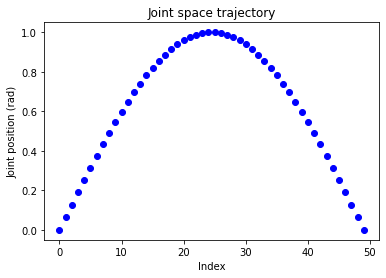

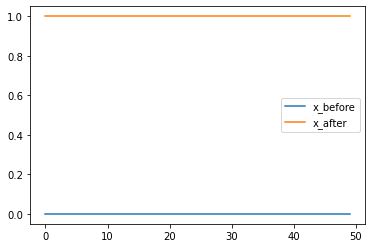

In [5]:
import matplotlib.pyplot as plt

# Number of steps in the trajectory
N = 50

# Define the joint space trajectory 
q = np.sin(np.linspace(0, 1, N) * np.pi)
print(q)

# This plots the sequence q_1, ..., q_n
plt.plot(q, 'bo')
plt.title("Joint space trajectory")
plt.xlabel("Index")
plt.ylabel("Joint position (rad)")


# Instantiate `GeometricModel1R` object + use the animate function to visualize 
geom1R = GeometricModel1R(2)
geom1R.animate(q)

# matrix

p = np.zeros((N, 2))

plt.figure()
plt.plot(p[:,0], label='x_before')

for i in range(N):
    # use DGM here 
    p[i,:] = np.ones(2)

plt.plot(p[:,0], label='x_after')
plt.legend()
    # to fill out some vector p
    
# Calculate the sequence p_1, ..., p_n 
    ### 
    ### To be completed
    ###

# Plot the sequence p_1, ..., p_n (plot x and y separately)
    ### 
    ### To be completed
    ###


# 2R robot

Now you will have to derive the DGM and IGM of the 2R planar robot (2 links, 2 revolute joints) shown below.

In [6]:
# If full github repo has been downloaded locally, uncomment these lines
# from IPython.display import Image
# Image("2dof.png")

# Otherwise click on the link below to see the figure

<!-- For Colab NB -->
[2R robot (click here)](https://drive.google.com/file/d/1Pdow1aMbsOGwISPOVpTHg5suiEBJ0y4z/view?usp=sharing)

__Question__ : Derive the DGM of the 2R robot, i.e. express $p=(x_p,y_p)$ in terms of the joint positions $(q_1,q_2)$. What happens in the DGM when $q_1 = q_2 = 0$ ?

Hint: use [projections](https://en.wikipedia.org/wiki/Rotation_of_axes). You might want to solve this by first computing the point between the $p$ and the origin. Then, think how the point $p$ relates to this point.

__Question__ : Derive the IGM of the 2R robot.

Hint: There exist at least $2$ methods to determine the IGM
- A geometric one using the [law of cosines](https://www.mathsisfun.com/algebra/trig-cosine-law.html), 
- An algebraic one (play around with the DGM equations)

__Question__ : How many solutions $q=(q_1,q_2)$ are there given some $p=(x_p,y_p)$ ? 

Hint: There are $3$ cases depending on the value of $p$

__Question__ : Write the GeometricModel2R class (complete the code below)

In [7]:
# Class for the geometric model of the 2R robot
class GeometricModel2R:
    '''
    Environment class for the geometric model of the 1R robot
    '''
    
    def __init__(self, L1, L2):
        ''' 
        To be completed
        '''
        
    def DGM(self, q):
        '''
        Implement here your DGM 
        '''

    def IGM(self, p):
        '''
        Implement here your IGM
        '''

    def animate(self, q):
        '''
        Animate the 2R robot using DGM 
        Input : sequence of joint positions [q1, ..., q2]
        '''
        fig = plt.figure()
        ax = plt.axes(xlim=(-self.L1 -1, self.L1 + 1), ylim=(-self.L2 -1, self.L2 + 1))
        link1, = ax.plot([], [], lw=4)
        link2, = ax.plot([], [], lw=4)
        base, = ax.plot([], [], 'o', color='black')
        endeff, = ax.plot([], [], 'o', color='pink')
        def init():
            link1.set_data([], [])
            link2.set_data([], [])
            base.set_data([], [])
            endeff.set_data([], [])
            return link1, link2, base, endeff
        def animate(i):
            p = self.DGM(q[:,i])
            x = p[0] 
            y = p[1] 
            link1.set_data([0,self.L1*np.cos(q[0,i])], [0,self.L1*np.sin(q[0,i])])
            link2.set_data([self.L1*np.cos(q[0,i]),x], [self.L1*np.sin(q[0,i]),y])
            base.set_data([0, 0])
            endeff.set_data([x, y])
            return link1, link2, base, endeff
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, "2R robot animation", transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
        ax.grid()
        ax.set_aspect("equal")
        
        anim = FuncAnimation(fig, animate, init_func=init,
                                       frames=np.shape(q)[1], interval=25, blit=True)
        plt.close(fig)
        plt.close(anim._fig)
        IPython.display.display_html(IPython.core.display.HTML(anim.to_html5_video()))

__Question__ : Now generate trajectories of your choice in the joint space (for instance you can define sines for $q_1,q_2$ as for the 1R example, but feel free to try out different trajectories). Plot them as done before, and calculate and plot the corresponding endeffector trajectory using the DGM you implemented in the `GeometricModel2R` class.

__Question__ : The other way around, now plot an end-effector trajectory you choose, calculate and plot the corresponding joint trajectories. 

# Summary

In this notebook we've introduced the concepts of joint space and task space. We derived and implemented the geometric model of the 1R and 2R robots. This description is "static", in a sense that it doesn't take into account velocities. The next notebook introduces the kinematic model, which relates velocities in the joint space to end-effector velocities in the task space.